In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#April Elections in israel 

elec = pd.read_csv('sep19.csv',encoding='Windows-1255')

In [3]:
elec.head()

,סמל ועדה,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,...,פה,ףז,צ,צן,ץ,ק,קך,קץ,רק,שס
0,17,שחר,7,517,377,0,377,31,8,0,...,98,0,0,0,0,0,0,0,0,39
1,2,תירוש,10,332,245,0,245,1,4,0,...,6,0,0,0,0,0,0,0,0,104
2,17,"ניר ח""ן",11,406,287,0,287,32,1,1,...,94,0,0,0,0,0,0,0,0,4
3,18,חצבה,13,502,373,0,373,24,2,0,...,216,0,0,0,0,2,0,0,0,1
4,17,נועם,15,308,228,1,227,1,4,0,...,13,0,0,0,0,0,0,0,0,36


In [4]:
#calculating voting precentage
overall = sum(elec['בזב'])
voters = sum(elec['כשרים'])

voting_pre = (voters/overall) * 100
print(voting_pre)

69.42035148855821


In [5]:
#sorting only the parties who is been elected

parties = elec[['שם ישוב','בזב','מצביעים','כשרים','פסולים','טב','אמת','מחל','פה','שס','ג','מרצ','ודעם','נ']]

In [6]:
parties.head()

,שם ישוב,בזב,מצביעים,כשרים,פסולים,טב,אמת,מחל,פה,שס,ג,מרצ,ודעם,נ
0,שחר,517,377,377,0,28,31,128,98,39,8,13,0,0
1,תירוש,332,245,245,0,11,1,93,6,104,4,1,0,0
2,"ניר ח""ן",406,287,287,0,13,32,57,94,4,1,5,1,1
3,חצבה,502,373,373,0,17,24,25,216,1,2,32,0,0
4,נועם,308,228,227,1,8,1,158,13,36,4,0,0,0


In [7]:
#Data cleaning - Checking for nulls

print(parties['שם ישוב'].isnull().sum())
print(parties['בזב'].isnull().sum())
print(parties['מצביעים'].isnull().sum())

0
0
0


In [8]:
#Data cleaning - Checking for ZEROS
print(parties['בזב'].eq(0).any())
print(parties['מצביעים'].eq(0).any())

parties[parties['בזב'] == 0]

True
False


,שם ישוב,בזב,מצביעים,כשרים,פסולים,טב,אמת,מחל,פה,שס,ג,מרצ,ודעם,נ
1213,מעטפות חיצוניות,0,282442,280216,2226,24810,13211,77953,84654,17598,11649,13861,11974,62


In [9]:
parties = parties[:1213]

In [10]:
print(parties['בזב'].eq(0).any())

False


In [11]:
parties.head()

,שם ישוב,בזב,מצביעים,כשרים,פסולים,טב,אמת,מחל,פה,שס,ג,מרצ,ודעם,נ
0,שחר,517,377,377,0,28,31,128,98,39,8,13,0,0
1,תירוש,332,245,245,0,11,1,93,6,104,4,1,0,0
2,"ניר ח""ן",406,287,287,0,13,32,57,94,4,1,5,1,1
3,חצבה,502,373,373,0,17,24,25,216,1,2,32,0,0
4,נועם,308,228,227,1,8,1,158,13,36,4,0,0,0


In [12]:
new_df = parties.drop(['בזב','פסולים','מצביעים','כשרים'],axis=1)
new_df.head()

,שם ישוב,טב,אמת,מחל,פה,שס,ג,מרצ,ודעם,נ
0,שחר,28,31,128,98,39,8,13,0,0
1,תירוש,11,1,93,6,104,4,1,0,0
2,"ניר ח""ן",13,32,57,94,4,1,5,1,1
3,חצבה,17,24,25,216,1,2,32,0,0
4,נועם,8,1,158,13,36,4,0,0,0


In [13]:
#Voting in the big cites

big_cities = new_df[new_df['שם ישוב'].isin(['תל אביב - יפו','ירושלים','חיפה','אשדוד','אילת'])]
big_cities.reset_index(inplace=True)
big_cities.drop('index',axis=1,inplace=True)
big_cities.set_index(big_cities['שם ישוב'],inplace=True)
big_cities.drop('שם ישוב',axis=1,inplace=True)
big_cities.head()

C:\Users\Amit Aizenkot Moyal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,טב,אמת,מחל,פה,שס,ג,מרצ,ודעם,נ
שם ישוב,,,,,,,,,
אשדוד,3689,3177,36221,18956,16300,13627,691,35,32
אילת,917,1049,9749,6440,1366,280,403,176,8
ירושלים,23722,8846,59798,30553,41531,64937,9391,3582,43
חיפה,5586,7885,33630,47394,3952,5629,7875,12697,36
תל אביב - יפו,6985,19208,50657,113843,10966,2934,38298,8446,41


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002418E8083C8>,
      dtype=object)

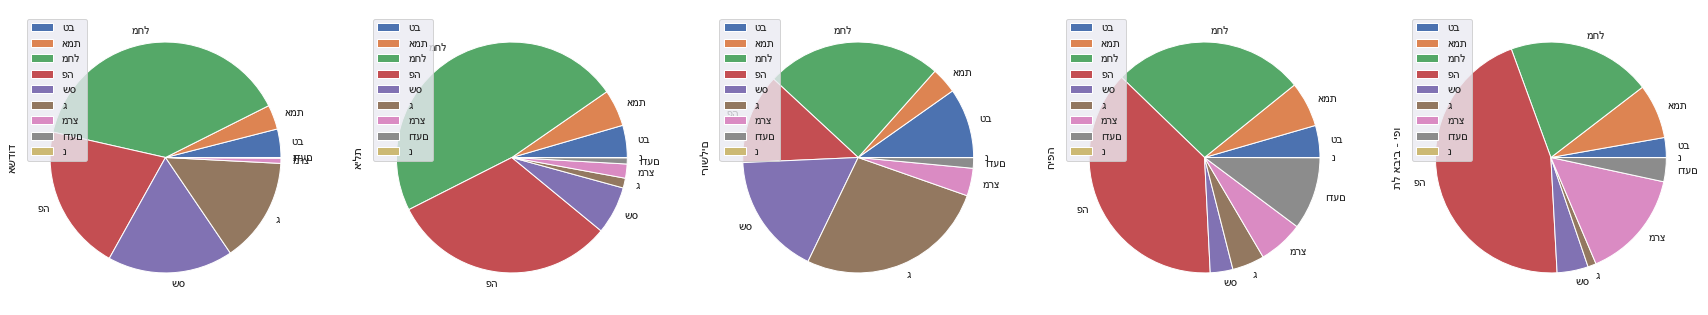

In [14]:
big_cities.T.plot.pie(subplots=True, figsize=(30,30))


In [15]:
#dsq votes

dsq = parties[['שם ישוב','מצביעים','פסולים']]
dsq.head()

,שם ישוב,מצביעים,פסולים
0,שחר,377,0
1,תירוש,245,0
2,"ניר ח""ן",287,0
3,חצבה,373,0
4,נועם,228,1


C:\Users\Amit Aizenkot Moyal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


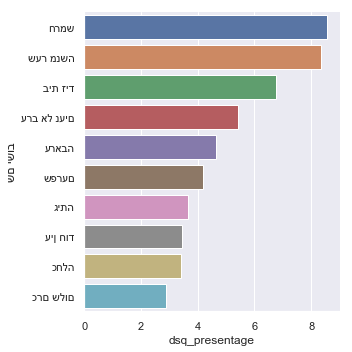

In [16]:
dsq['dsq_presentage'] = (dsq['פסולים']/dsq['מצביעים']) * 100 
ddata = dsq.sort_values(by = 'dsq_presentage',ascending=False).head(10)
sns.catplot(x="dsq_presentage",y="שם ישוב",data=ddata,kind='bar')

ValueError: Could not interpret input 'daam_prec'

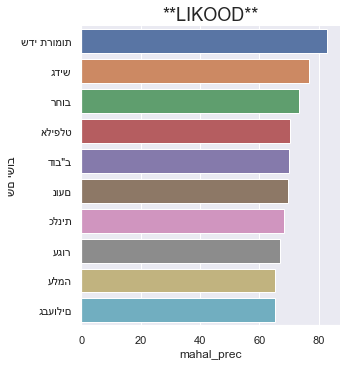

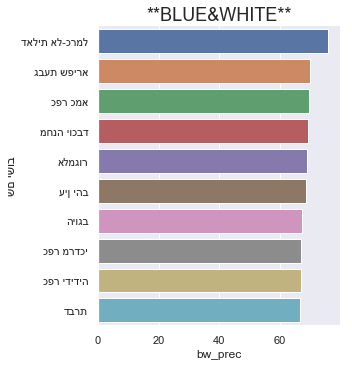

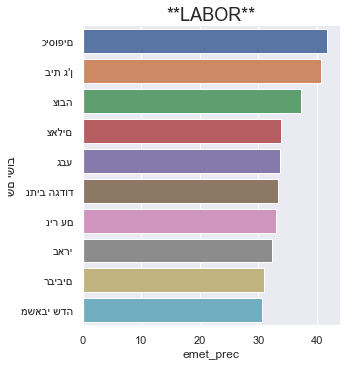

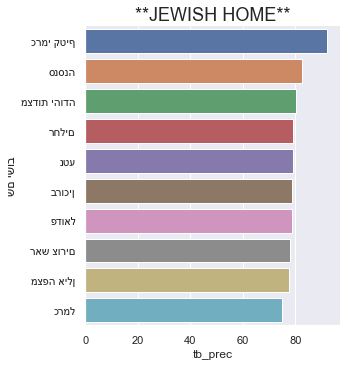

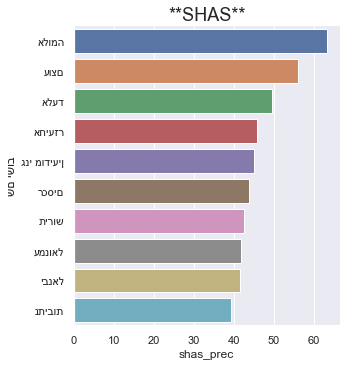

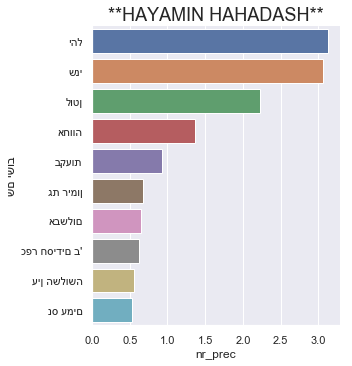

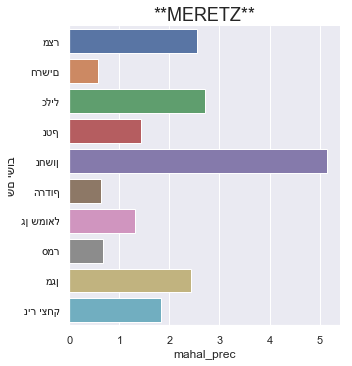

In [17]:
#Voting for each representative 

#likood

parties['mahal_prec'] = (parties['מחל'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'mahal_prec',ascending=False).head(10)
sns.catplot(x="mahal_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**LIKOOD**',size=18)

#Blue&White

parties['bw_prec'] = (parties['פה'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'bw_prec',ascending=False).head(10)
sns.catplot(x="bw_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**BLUE&WHITE**',size=18)

#Labor party

parties['emet_prec'] = (parties['אמת'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'emet_prec',ascending=False).head(10)
sns.catplot(x="emet_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**LABOR**',size=18)

#Juwish home party

parties['tb_prec'] = (parties['טב'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'tb_prec',ascending=False).head(10)
sns.catplot(x="tb_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**JEWISH HOME**',size=18)

#shas 

parties['shas_prec'] = (parties['שס'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'shas_prec',ascending=False).head(10)
sns.catplot(x="shas_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**SHAS**',size=18)


#Hayamin Hahadash

parties['nr_prec'] = (parties['נ'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'nr_prec',ascending=False).head(10)
sns.catplot(x="nr_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**HAYAMIN HAHADASH**',size=18)

#Meretz

parties['meretz_prec'] = (parties['מרצ'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'meretz_prec',ascending=False).head(10)
sns.catplot(x="mahal_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**MERETZ**',size=18)

#Arabs united list

parties['vdaam_prec'] = (parties['ודעם'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'vdaam_prec',ascending=False).head(10)
sns.catplot(x="daam_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**ARABS UNITED LIST**',size=18)


In [18]:
#clustring to find similar voting places

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [19]:
clustering_data = parties[['שם ישוב','mahal_prec','tb_prec','bw_prec','nr_prec','meretz_prec','emet_prec','shas_prec','vdaam_prec']]

In [20]:
clustering_data.head()

,שם ישוב,mahal_prec,tb_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,vdaam_prec
0,שחר,33.952255,7.427056,25.994695,0.000000,3.448276,8.222812,10.344828,0.000000
1,תירוש,37.959184,4.489796,2.448980,0.000000,0.408163,0.408163,42.448980,0.000000
2,"ניר ח""ן",19.860627,4.529617,32.752613,0.348432,1.742160,11.149826,1.393728,0.348432
3,חצבה,6.702413,4.557641,57.908847,0.000000,8.579088,6.434316,0.268097,0.000000
4,נועם,69.603524,3.524229,5.726872,0.000000,0.000000,0.440529,15.859031,0.000000


In [21]:
clustering_data.describe()

,mahal_prec,tb_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,vdaam_prec
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,19.508844,10.100155,31.407246,0.024999,7.622491,7.851626,3.673056,9.050962
std,17.087213,18.162139,21.722050,0.160698,9.136212,6.707255,6.689987,25.473486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.722892,1.261830,8.877285,0.000000,0.769231,2.545969,0.193798,0.000000
50%,14.250614,3.131524,34.692407,0.000000,4.281346,6.743480,0.913242,0.104767
75%,30.065359,6.584362,50.772201,0.000000,11.405295,11.196911,4.241436,0.564972
max,82.916667,92.222222,75.782093,3.125000,50.318471,41.780822,63.176895,97.974414


Text(0, 0.5, 'WCSS')

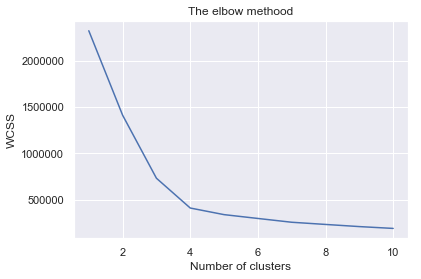

In [22]:
X = clustering_data.drop('שם ישוב',axis=1)

#The elbow methood

wcss=[]

for i in range(1,11):
    kmens = KMeans(n_clusters=i,init = 'k-means++',max_iter= 300,n_init=10,random_state=0)
    kmens.fit(X)
    wcss.append(kmens.inertia_)

    
plt.plot(range(1,11),wcss)
plt.title("The elbow methood")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
    

In [23]:
kmens = KMeans(n_clusters=4,init = 'k-means++',max_iter= 300,n_init=10,random_state=0)

y_kmeans = kmens.fit_predict(X)

In [24]:
clusterd_data = clustering_data.copy()
clusterd_data['cluster'] = y_kmeans

In [25]:
clusterd_data[clusterd_data['cluster'] == 0][:10]

,שם ישוב,mahal_prec,tb_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,vdaam_prec,cluster
2,"ניר ח""ן",19.860627,4.529617,32.752613,0.348432,1.742160,11.149826,1.393728,0.348432,0
3,חצבה,6.702413,4.557641,57.908847,0.000000,8.579088,6.434316,0.268097,0.000000,0
5,בית ניר,2.881844,0.576369,44.092219,0.000000,38.328530,9.798271,0.288184,1.152738,0
6,שדה משה,25.742574,1.320132,49.834983,0.000000,2.640264,7.260726,0.660066,0.000000,0
7,באר אורה,24.940048,3.357314,42.925659,0.000000,7.434053,9.112710,0.959233,0.719424,0
8,מקווה ישראל,26.315789,6.315789,47.368421,0.000000,9.473684,6.315789,1.052632,0.000000,0
10,לכיש,6.263499,2.591793,57.019438,0.000000,17.926566,11.231102,0.215983,0.431965,0
11,ראש פינה,24.898668,5.674580,38.390272,0.000000,10.538506,11.464968,1.100174,0.752750,0
13,מזכרת בתיה,26.696035,7.010699,43.511643,0.037760,4.845815,8.219006,2.177470,0.088106,0
14,יסוד המעלה,20.184544,6.689735,51.095732,0.000000,8.073818,7.266436,0.807382,0.115340,0


In [26]:
clusterd_data[clusterd_data['cluster'] == 1][:10]

,שם ישוב,mahal_prec,tb_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,vdaam_prec,cluster
9,אמציה,20.979021,39.860140,20.279720,0.0,0.699301,4.195804,1.398601,0.0,1
34,נחושה,20.067454,57.335582,8.094435,0.0,0.337268,2.192243,3.878583,0.0,1
84,שדה יעקב,24.898785,45.546559,13.157895,0.0,1.214575,5.060729,1.821862,0.0,1
118,כפר פינס,16.556291,68.874172,6.291391,0.0,0.331126,0.993377,0.000000,0.0,1
138,"כפר הרא""ה",15.834768,56.970740,12.048193,0.0,0.860585,3.098107,2.065404,0.0,1
173,טירת צבי,14.285714,54.545455,15.584416,0.0,1.038961,8.051948,0.259740,0.0,1
202,שדה אליהו,16.901408,59.718310,12.394366,0.0,0.563380,5.352113,0.000000,0.0,1
205,הזורעים,24.821002,54.176611,3.579952,0.0,0.715990,1.909308,3.102625,0.0,1
226,קבוצת יבנה,15.137615,38.761468,29.816514,0.0,1.146789,9.403670,0.458716,0.0,1
239,ניצן,30.939227,44.843462,2.946593,0.0,0.092081,1.749540,4.327808,0.0,1


In [27]:
clusterd_data[clusterd_data['cluster'] == 2][:10]

,שם ישוב,mahal_prec,tb_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,vdaam_prec,cluster
337,אבו גוש,4.779717,0.083126,12.261014,0.041563,3.408146,1.662510,2.161264,71.986700,2
338,אבו סנאן,3.987894,0.106819,14.278084,0.017803,0.979170,1.566673,4.041303,66.921844,2
339,דחי,0.751880,0.375940,4.135338,0.000000,2.255639,1.127820,0.000000,89.097744,2
340,אכסאל,0.697229,0.017431,1.777933,0.034861,0.784382,0.261461,0.139446,95.363430,2
342,מגאר,2.696167,0.979325,27.010035,0.036271,2.285092,2.744529,8.209406,45.786483,2
343,בועיינה-נוג'ידאת,0.891493,0.050942,6.775344,0.025471,1.502802,3.005604,0.585838,85.455935,2
344,בענה,0.841751,0.024050,0.986051,0.000000,0.456950,0.384800,0.432900,95.189995,2
346,ג'ש (גוש חלב),0.618982,0.206327,6.946355,0.000000,2.819807,2.613480,0.481431,62.723521,2
347,דבוריה,0.918047,0.156740,0.649351,0.000000,1.097179,0.335871,0.179131,95.230631,2
348,דייר אל-אסד,0.450668,0.048286,1.722195,0.000000,0.595526,1.255432,7.661355,80.186705,2


In [28]:
clusterd_data[clusterd_data['cluster'] == 3][:10]

,שם ישוב,mahal_prec,tb_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,vdaam_prec,cluster
0,שחר,33.952255,7.427056,25.994695,0.000000,3.448276,8.222812,10.344828,0.000000,3
1,תירוש,37.959184,4.489796,2.448980,0.000000,0.408163,0.408163,42.448980,0.000000,3
4,נועם,69.603524,3.524229,5.726872,0.000000,0.000000,0.440529,15.859031,0.000000,3
12,שדות מיכה,40.860215,5.376344,5.376344,0.000000,0.000000,3.763441,27.956989,0.000000,3
15,אופקים,34.647568,4.297263,6.949369,0.035456,0.375833,3.460502,22.812367,0.085094,3
16,עוצם,31.871345,2.631579,2.339181,0.000000,0.000000,1.754386,55.847953,0.000000,3
19,שדה דוד,45.367412,3.833866,18.210863,0.000000,0.638978,3.833866,15.974441,0.319489,3
20,איתן,51.601423,8.896797,2.491103,0.000000,0.000000,0.711744,15.658363,0.000000,3
21,גפן,51.658768,6.161137,7.582938,0.000000,0.947867,2.369668,24.644550,0.000000,3
22,אליכין,48.377282,6.643002,17.139959,0.000000,1.470588,4.411765,13.488844,0.000000,3


In [29]:
#And the big cities

clusterd_data[clusterd_data['שם ישוב'].isin(['תל אביב - יפו','ירושלים','חיפה','אשדוד','אילת'])]

,שם ישוב,mahal_prec,tb_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,vdaam_prec,cluster
42,אשדוד,31.227154,3.180392,16.342506,0.027588,0.595731,2.738982,14.052693,0.030174,3
999,אילת,42.918776,4.036980,28.351310,0.035219,1.774158,4.618094,6.013647,0.774818,3
1010,ירושלים,23.001265,9.124653,11.752193,0.016540,3.612243,3.402609,15.974875,1.377814,3
1136,חיפה,23.347357,3.878036,32.902903,0.024993,5.467155,5.474098,2.743644,8.814790,0
1174,תל אביב - יפו,19.019460,2.622558,42.743004,0.015394,14.379203,7.211753,4.117247,3.171099,0


In [30]:
#Profiling the clusters

c1 = clusterd_data[clusterd_data['cluster'] == 0]
c2 = clusterd_data[clusterd_data['cluster'] == 1]
c3 = clusterd_data[clusterd_data['cluster'] == 2]
c4 = clusterd_data[clusterd_data['cluster'] == 3]

m1 = {'m_mahal':np.mean(c1.mahal_prec),
     'm_tb':np.mean(c1.tb_prec),
     'm_bw':np.mean(c1.bw_prec),
     'm_nr':np.mean(c1.nr_prec),
     'm_meretz':np.mean(c1.meretz_prec),
     'm_emet':np.mean(c1.emet_prec),
     'm_vdaam':np.mean(c1.vdaam_prec),
     'm_shas':np.mean(c1.shas_prec) 
      }

mean1 = pd.DataFrame([m1],index=['AVG_Votes']).transpose().reset_index()
mean1.rename({'index':'Party'}, axis=1, inplace=True)



m2 = {'m_mahal':np.mean(c2.mahal_prec),
     'm_tb':np.mean(c2.tb_prec),
     'm_bw':np.mean(c2.bw_prec),
     'm_nr':np.mean(c2.nr_prec),
     'm_meretz':np.mean(c2.meretz_prec),
     'm_emet':np.mean(c2.emet_prec),
     'm_vdaam':np.mean(c2.vdaam_prec),
     'm_shas':np.mean(c2.shas_prec)  
      }

mean2 = pd.DataFrame([m2],index=['AVG_Votes']).transpose().reset_index()
mean2.rename({'index':'Party'}, axis=1, inplace=True)



m3 = {'m_mahal':np.mean(c3.mahal_prec),
     'm_tb':np.mean(c3.tb_prec),
     'm_bw':np.mean(c3.bw_prec),
     'm_nr':np.mean(c3.nr_prec),
     'm_meretz':np.mean(c3.meretz_prec),
     'm_emet':np.mean(c3.emet_prec),
     'm_vdaam':np.mean(c3.vdaam_prec),
     'm_shas':np.mean(c3.shas_prec) 
      }

mean3 = pd.DataFrame([m3],index=['AVG_Votes']).transpose().reset_index()
mean3.rename({'index':'Party'}, axis=1, inplace=True)



m4 = {'m_mahal':np.mean(c4.mahal_prec),
     'm_tb':np.mean(c4.tb_prec),
     'm_bw':np.mean(c4.bw_prec),
     'm_nr':np.mean(c4.nr_prec),
     'm_meretz':np.mean(c4.meretz_prec),
     'm_emet':np.mean(c4.emet_prec),
     'm_vdaam':np.mean(c4.vdaam_prec),
     'm_shas':np.mean(c4.shas_prec)
     }

mean4 = pd.DataFrame([m4],index=['AVG_Votes']).transpose().reset_index()
mean4.rename({'index':'Party'}, axis=1, inplace=True)


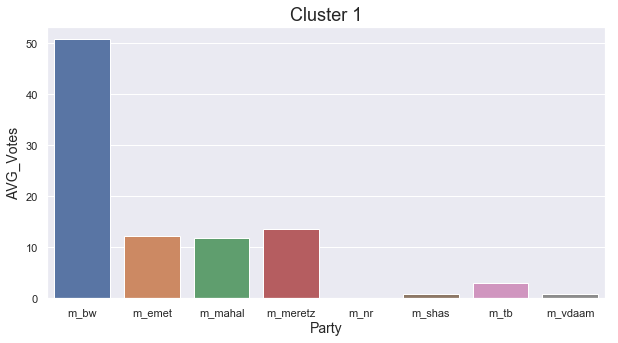

In [31]:
plt.figure(figsize=(10,5))
plt.title('Cluster 1',size=18)
plt.xlabel('Party',size=14)
plt.ylabel('AVG_Votes',size=14)
sns.barplot(x='Party',y='AVG_Votes',data=mean1)

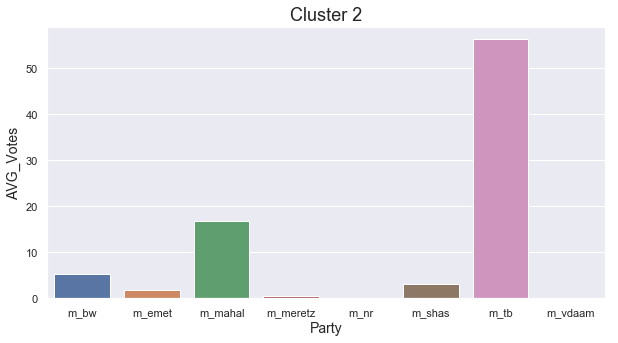

In [32]:
plt.figure(figsize=(10,5))
plt.title('Cluster 2',size=18)
plt.xlabel('Party',size=14)
plt.ylabel('AVG_Votes',size=14)
sns.barplot(x='Party',y='AVG_Votes',data=mean2)

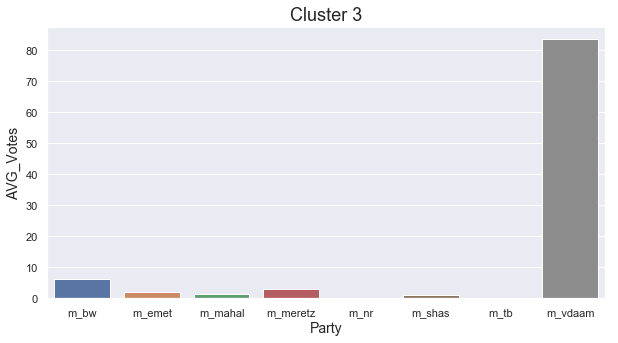

In [33]:
plt.figure(figsize=(10,5))
plt.title('Cluster 3',size=18)
plt.xlabel('Party',size=14)
plt.ylabel('AVG_Votes',size=14)
sns.barplot(x='Party',y='AVG_Votes',data=mean3)


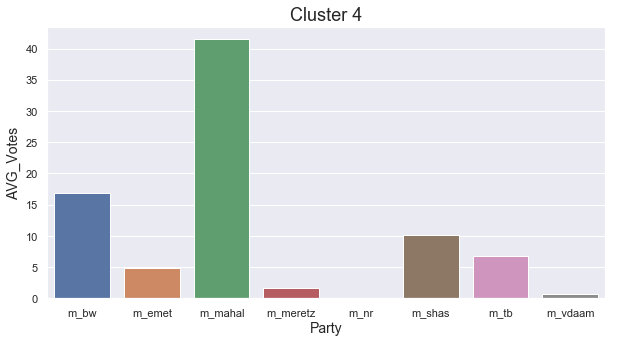

In [34]:
plt.figure(figsize=(10,5))
plt.title('Cluster 4',size=18)
plt.xlabel('Party',size=14)
plt.ylabel('AVG_Votes',size=14)
sns.barplot(x='Party',y='AVG_Votes',data=mean4)